In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
path = "https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hackpredict_homestay/Data/Train.csv"
df_r = pd.read_csv(path)

In [11]:
path_ss = "https://raw.githubusercontent.com/Vyaghri-Sista/RentalProperty-prediction/main/Mod_Data.csv"
df1 = pd.read_csv(path_ss)
df1.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Distance in m
0,0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0,3531.592026
1,1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0,1053.236649
2,2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365,3625.877178
3,3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82,11083.756514
4,4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365,1928.404038


## Price Distribution (Actual Dataset)

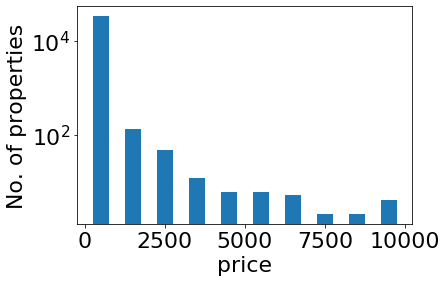

In [12]:
import matplotlib 
#matplotlib.rcParams["figure.figsize"] = (15,10)
plt.yscale('log')
plt.hist(df1.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

In [13]:
df1["neighbourhood"].value_counts()

Williamsburg                  2756
Bedford-Stuyvesant            2577
Harlem                        1877
Bushwick                      1719
Upper West Side               1403
                              ... 
Bay Terrace, Staten Island       1
Lighthouse Hill                  1
Richmondtown                     1
Rossville                        1
Huguenot                         1
Name: neighbourhood, Length: 217, dtype: int64

In [14]:
df1_10000 = df1[["neighbourhood","price"]].value_counts().reset_index(name='counts')
df1_10000

,neighbourhood,price,counts
0,Bushwick,50,151
1,Bedford-Stuyvesant,50,134
2,Williamsburg,100,127
3,Bedford-Stuyvesant,60,126
4,Williamsburg,60,117
...,...,...,...
9272,Longwood,130,1
9273,Longwood,150,1
9274,Longwood,155,1
9275,Lower East Side,29,1


## Neighbourhood vs Price wrt homestays for whole data

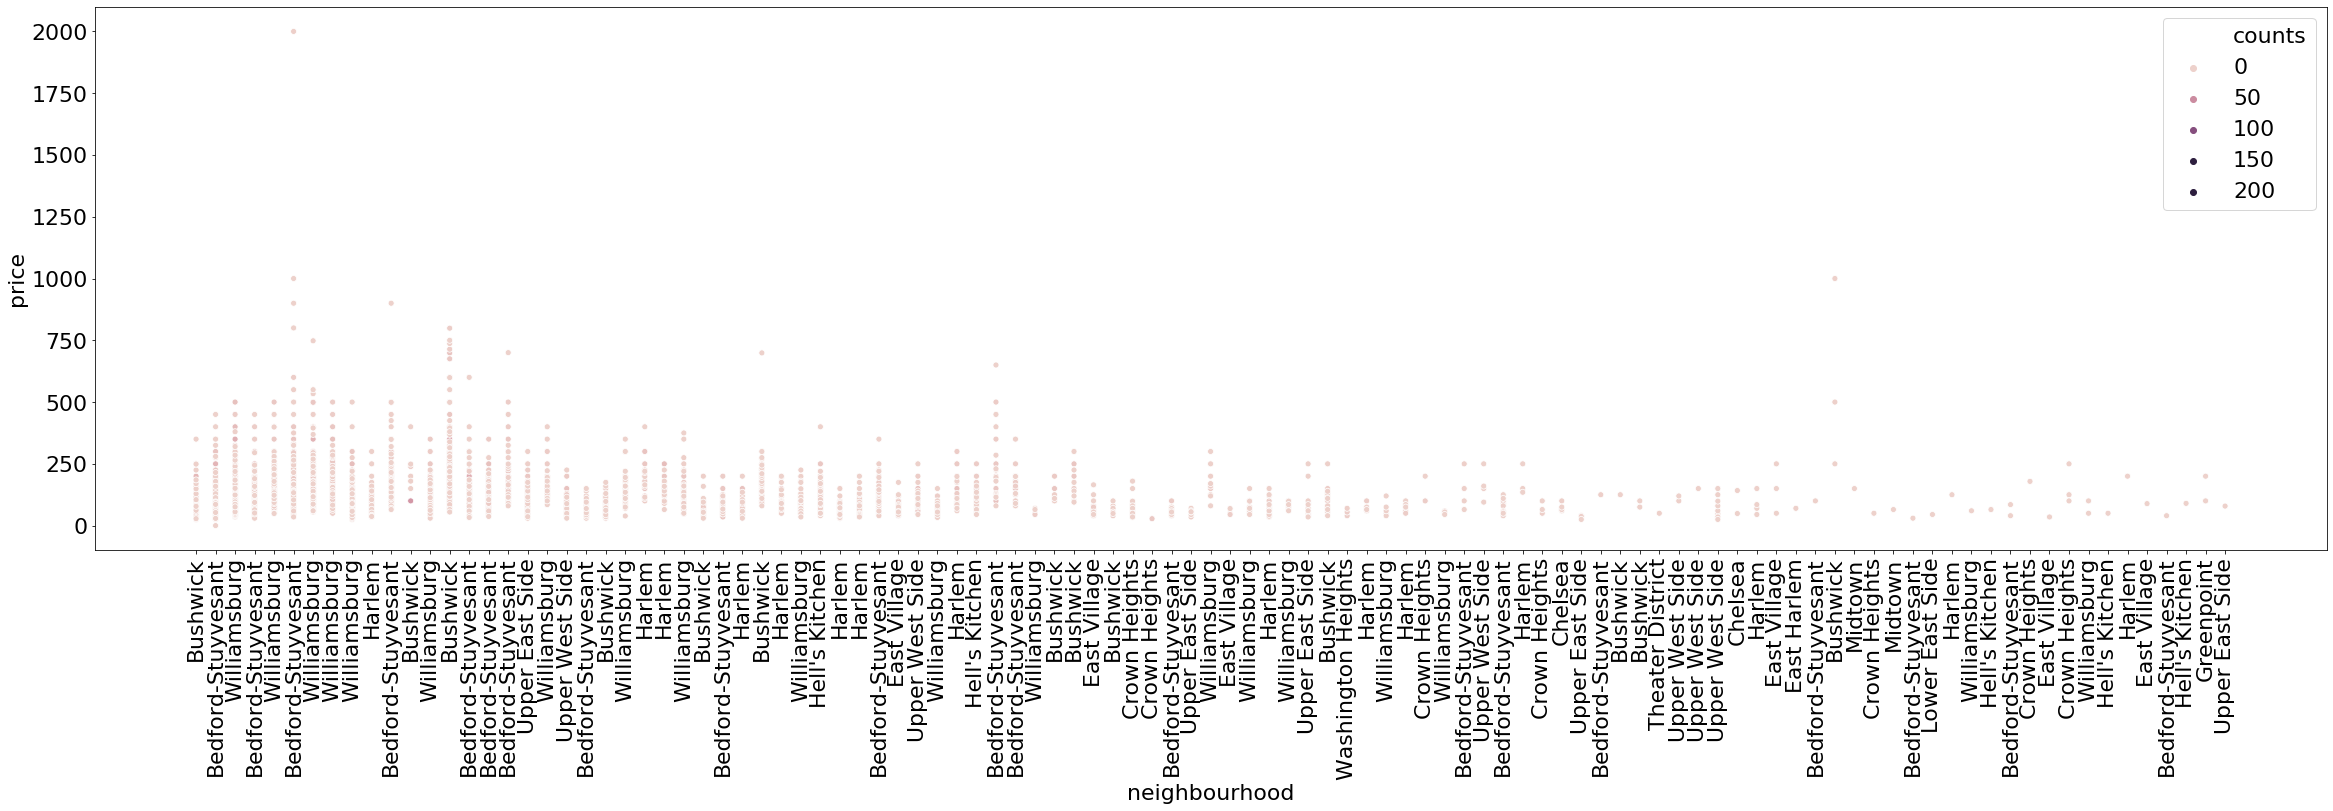

In [6]:
import seaborn as sns

plt.figure(figsize = (40,10))

ax = sns.scatterplot(x = 'neighbourhood', y = 'price',hue = 'counts',  data = df_10000.head(2000))

ax.set_xticklabels(df_10000.neighbourhood, rotation=90)

plt.show()

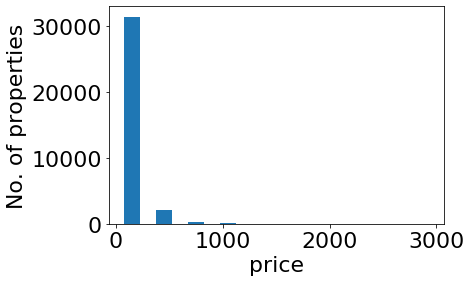

In [7]:
df2 = df1[df1.price<3000]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

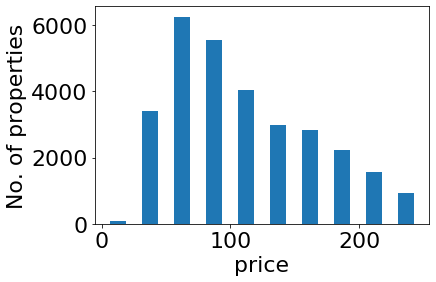

In [24]:
df2 = df1[df1.price < 250]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

In [25]:
df1.shape , df2.shape

((34226, 18), (29848, 18))

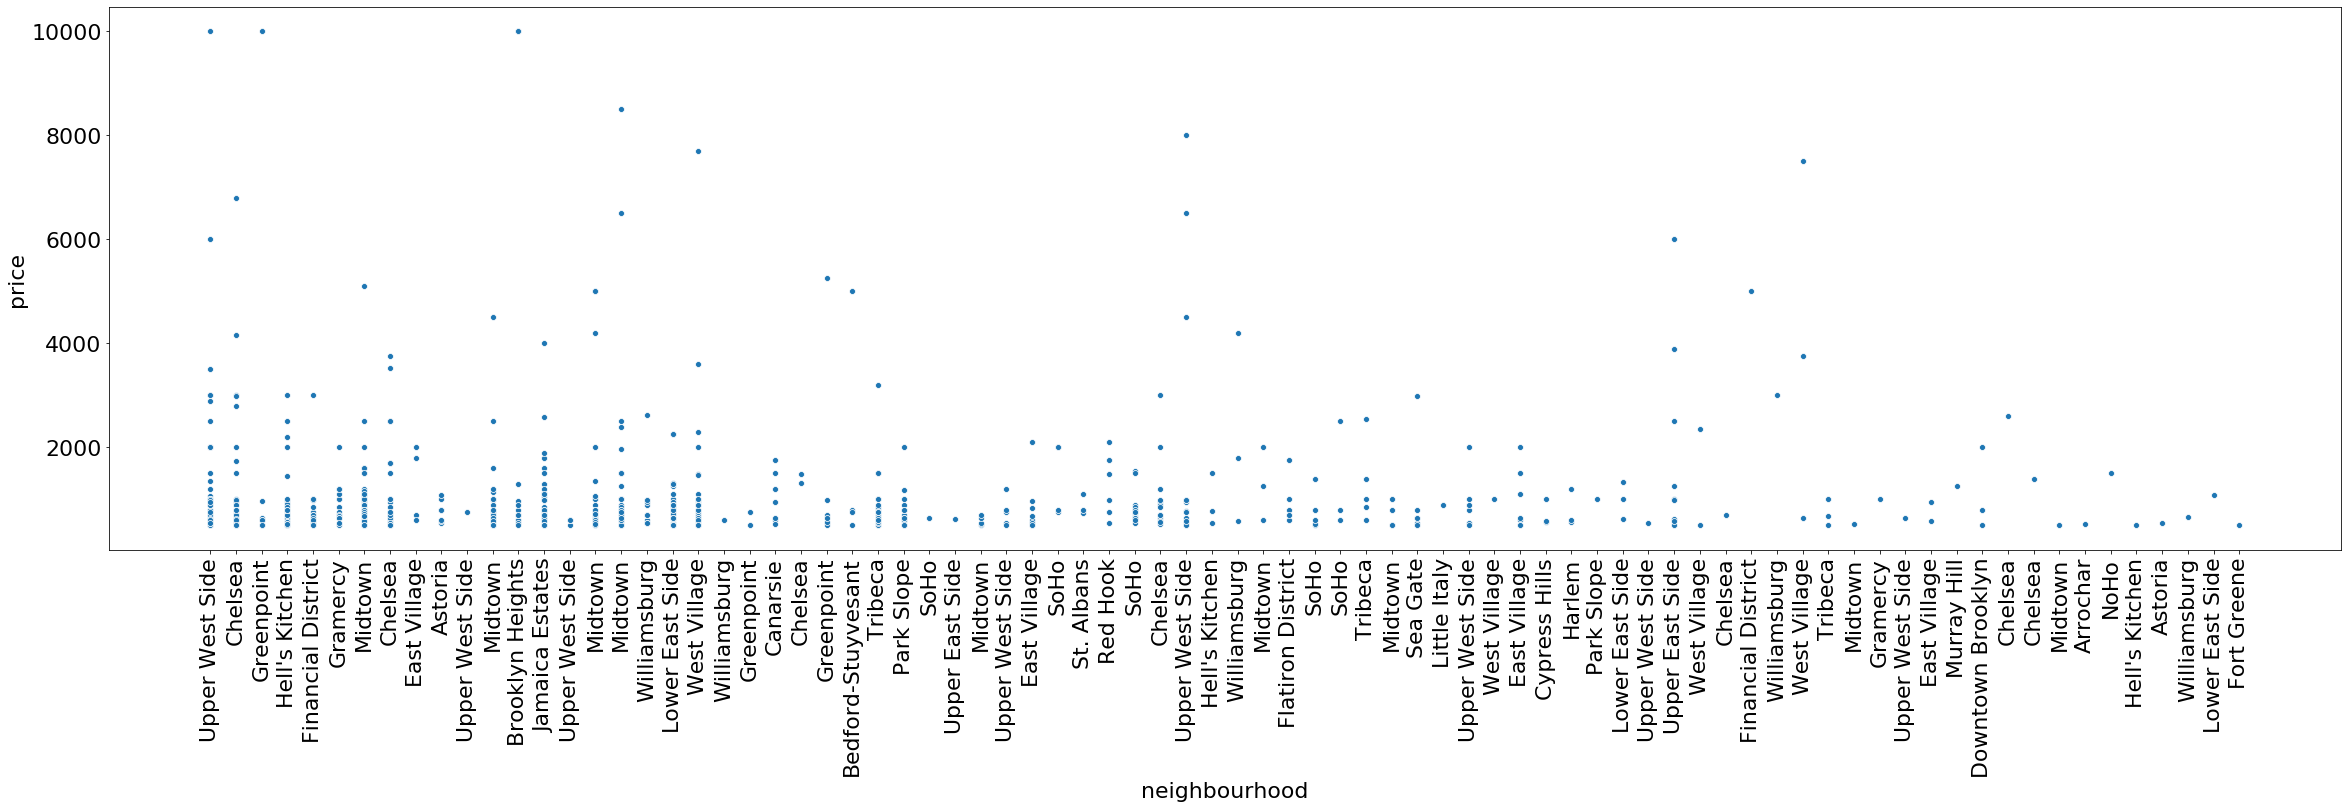

In [30]:
plt.figure(figsize = (40,10))

ax = sns.scatterplot(x = 'neighbourhood', y = 'price',  data = df2.head(1000))

ax.set_xticklabels(df2.neighbourhood, rotation=90)

plt.show()

In [27]:
df2 = df1[df1.price>=500]
df2.shape

(892, 18)

In [11]:

df1['neighbourhood_group'].value_counts()

Manhattan        15193
Brooklyn         14033
Queens            3985
Bronx              767
Staten Island      248
Name: neighbourhood_group, dtype: int64

In [12]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).head(10)

,host_name,neighbourhood_group,neighbourhood,room_type,price
29644,Erin,Brooklyn,Greenpoint,Entire home/apt,10000
12404,Jelena,Manhattan,Upper West Side,Entire home/apt,10000
12523,Matt,Manhattan,Lower East Side,Entire home/apt,9999
20810,Amy,Manhattan,Lower East Side,Private room,9999
23350,Rum,Manhattan,Tribeca,Entire home/apt,8500
31293,Jessica,Brooklyn,Clinton Hill,Entire home/apt,8000
3719,Sally,Manhattan,Upper East Side,Entire home/apt,7703
15974,Jack,Manhattan,Battery Park City,Entire home/apt,7500
7817,Kevin,Manhattan,Chelsea,Entire home/apt,6800
3754,Jonathan,Brooklyn,Clinton Hill,Entire home/apt,6500


In [13]:

df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).tail(10)

,host_name,neighbourhood_group,neighbourhood,room_type,price
23016,Rachel,Brooklyn,Sunset Park,Entire home/apt,10
26630,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0
2133,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0
32184,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0
30259,Martial Loft,Brooklyn,Bushwick,Private room,0
25414,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0
21441,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0
11311,Sergii,Brooklyn,Bushwick,Shared room,0
25277,Lauren,Brooklyn,Greenpoint,Private room,0
11638,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0


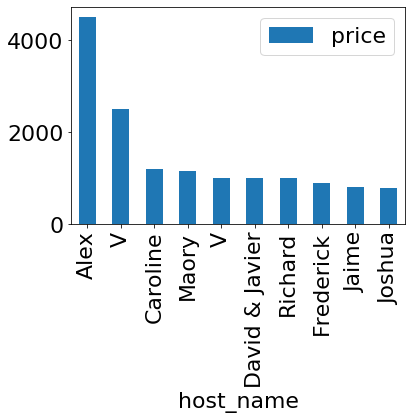

In [14]:
df2 = df1[ df1['room_type']=='Entire home/apt']

df3 = df2[ df2['neighbourhood_group']=='Brooklyn']

#df4 = df3[ df3['host_name']=='Sonder (NYC)']

#df3['neighbourhood'].value_counts()

df4=df3[df3['neighbourhood']=='Williamsburg']

df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).head(10)
#plt.figure(figsize=(30,20))
df5.plot(kind='bar',x='host_name',y='price')

plt.show()

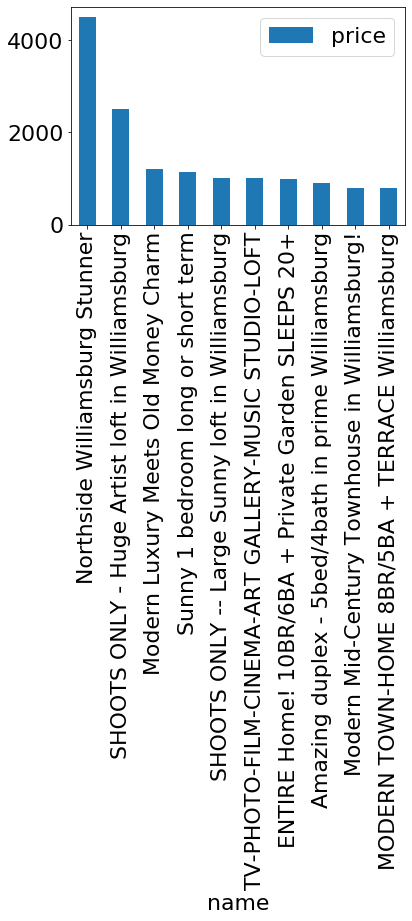

In [15]:

df5.plot(kind='bar',x='name',y='price')
plt.show()

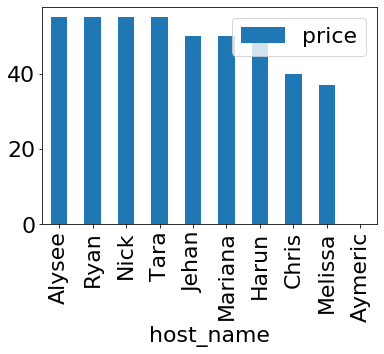

In [16]:
df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).tail(10)
df5.plot(kind='bar',x='host_name',y='price')
plt.show()

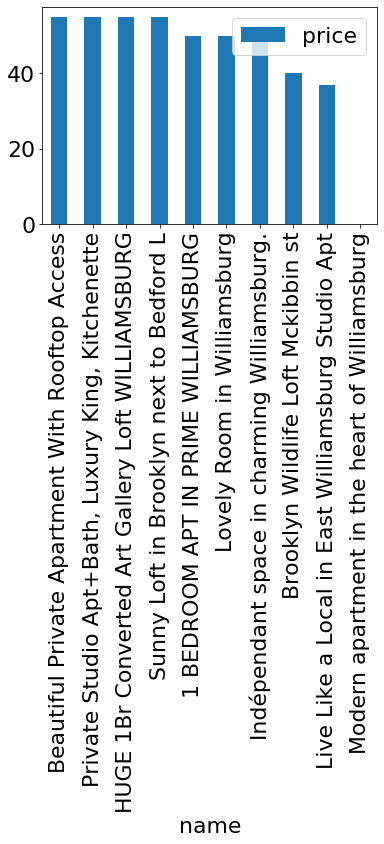

In [17]:
df5.plot(kind='bar',x='name',y='price')
plt.show()

## Data Cleaning

In [32]:
df1.name

0                             Large private room in Nolita
1                       Super Bowl New York City Apartment
2           COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION
3             Stream-Pressed Paradise (Laundry Room Setup)
4                                Charming Harlem apartment
                               ...                        
34221                                    Ridgewood retreat
34222                  Private BR & Bath near Central Park
34223    Warm Home w/ Private Garden (Inwood Manhattan ...
34224                                 Chill Bushwick Suite
34225    Cozy and simple Bedstuy studio right by the train
Name: name, Length: 34226, dtype: object

In [33]:
df2=df1.drop(['name', 'host_name',
       'neighbourhood_group','minimum_nights', 'number_of_reviews','last_review','reviews_per_month', 'calculated_host_listings_count','availability_365'], axis='columns')
df2.head()

,Unnamed: 0,id,host_id,neighbourhood,latitude,longitude,room_type,price,Distance in m
0,0,5728806,4271676,Nolita,40.72217,-73.99481,Private room,120,3531.592026
1,1,2243769,11460768,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1053.236649
2,2,35515415,267193767,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,3625.877178
3,3,36202006,43392243,Concord,40.60110,-74.07830,Shared room,30,11083.756514
4,4,3780951,16065171,Harlem,40.81022,-73.94266,Shared room,115,1928.404038


In [34]:
df3 = df2[df2.price < 250]
df4 = df3[df3.price >= 40]


df4.shape

(28447, 9)

In [35]:

col = df4.room_type

coln =[]

for rmtype in col:
    if(rmtype=='Private room'):
        coln.append(1)
    if(rmtype=='Entire home/apt'):
        coln.append(2)
    if(rmtype=='Shared room'):
        coln.append(3)
        
df4["room_type_new"]=coln

df4.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Unnamed: 0,id,host_id,neighbourhood,latitude,longitude,room_type,price,Distance in m,room_type_new
0,0,5728806,4271676,Nolita,40.72217,-73.99481,Private room,120,3531.592026,1
2,2,35515415,267193767,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,3625.877178,2
4,4,3780951,16065171,Harlem,40.81022,-73.94266,Shared room,115,1928.404038,3
5,5,9944426,51105827,Battery Park City,40.71192,-74.01572,Entire home/apt,225,4380.596617,2
6,6,19786915,86892032,Rosedale,40.65766,-73.72838,Entire home/apt,60,12386.477618,2
7,7,22368751,20800727,Fort Greene,40.69064,-73.97898,Entire home/apt,200,5152.596065,2
9,9,12705519,1372942,Washington Heights,40.83170,-73.94290,Entire home/apt,180,2953.775603,2
10,10,4823959,24633966,Kensington,40.64469,-73.97086,Private room,50,7697.673952,1
11,11,20817201,643120,Williamsburg,40.71591,-73.95513,Private room,50,3797.609601,1
12,12,13387453,23273780,Harlem,40.81619,-73.93798,Entire home/apt,77,2311.430675,2


In [36]:
df4.corr()

,Unnamed: 0,id,host_id,latitude,longitude,price,Distance in m,room_type_new
Unnamed: 0,1.000000,-0.002768,-0.004106,-0.005078,0.008187,-0.004163,0.003576,-0.000053
id,-0.002768,1.000000,0.574986,-0.005100,0.107134,-0.038906,0.070505,-0.045726
host_id,-0.004106,0.574986,1.000000,0.017633,0.149418,-0.052197,0.082709,-0.060103
latitude,-0.005078,-0.005100,0.017633,1.000000,0.089350,0.053655,-0.727446,-0.007960
longitude,0.008187,0.107134,0.149418,0.089350,1.000000,-0.299072,0.324237,-0.138876
price,-0.004163,-0.038906,-0.052197,0.053655,-0.299072,1.000000,-0.252500,0.544850
Distance in m,0.003576,0.070505,0.082709,-0.727446,0.324237,-0.252500,1.000000,-0.078515
room_type_new,-0.000053,-0.045726,-0.060103,-0.007960,-0.138876,0.544850,-0.078515,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216B41F4788>,
      dtype=object)

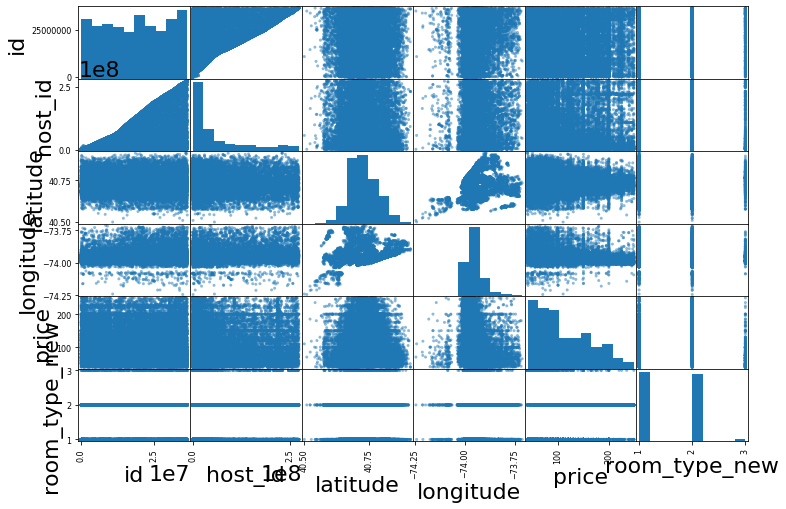

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["id","host_id","latitude","longitude","price","room_type_new"]

scatter_matrix(df4[attributes],figsize = (12,8))

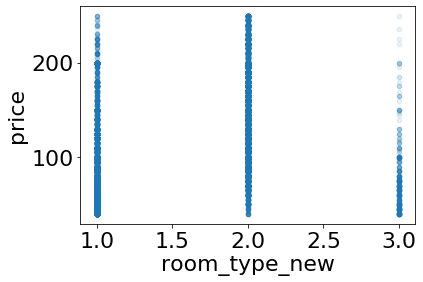

In [38]:
df4.plot(kind = "scatter", x = "room_type_new", y = "price", alpha = 0.1)

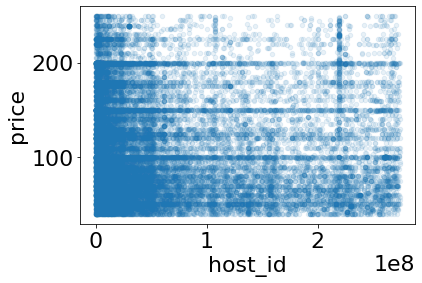

In [39]:
df4.plot(kind = "scatter", x = "host_id", y = "price", alpha = 0.1)

<Figure size 1440x5760 with 0 Axes>

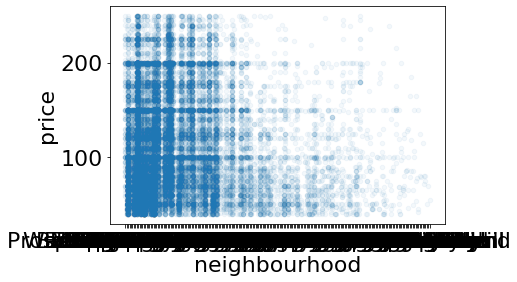

In [40]:
plt.figure(figsize = (20,80))

df4.plot(kind = "scatter", x = "neighbourhood", y = "price", alpha = 0.05)

In [46]:
df4.neighbourhood.value_counts()

Williamsburg                  2387
Bedford-Stuyvesant            2287
Harlem                        1698
Bushwick                      1519
Upper West Side               1106
                              ... 
Lighthouse Hill                  1
Eltingville                      1
Huguenot                         1
Bay Terrace, Staten Island       1
Graniteville                     1
Name: neighbourhood, Length: 216, dtype: int64

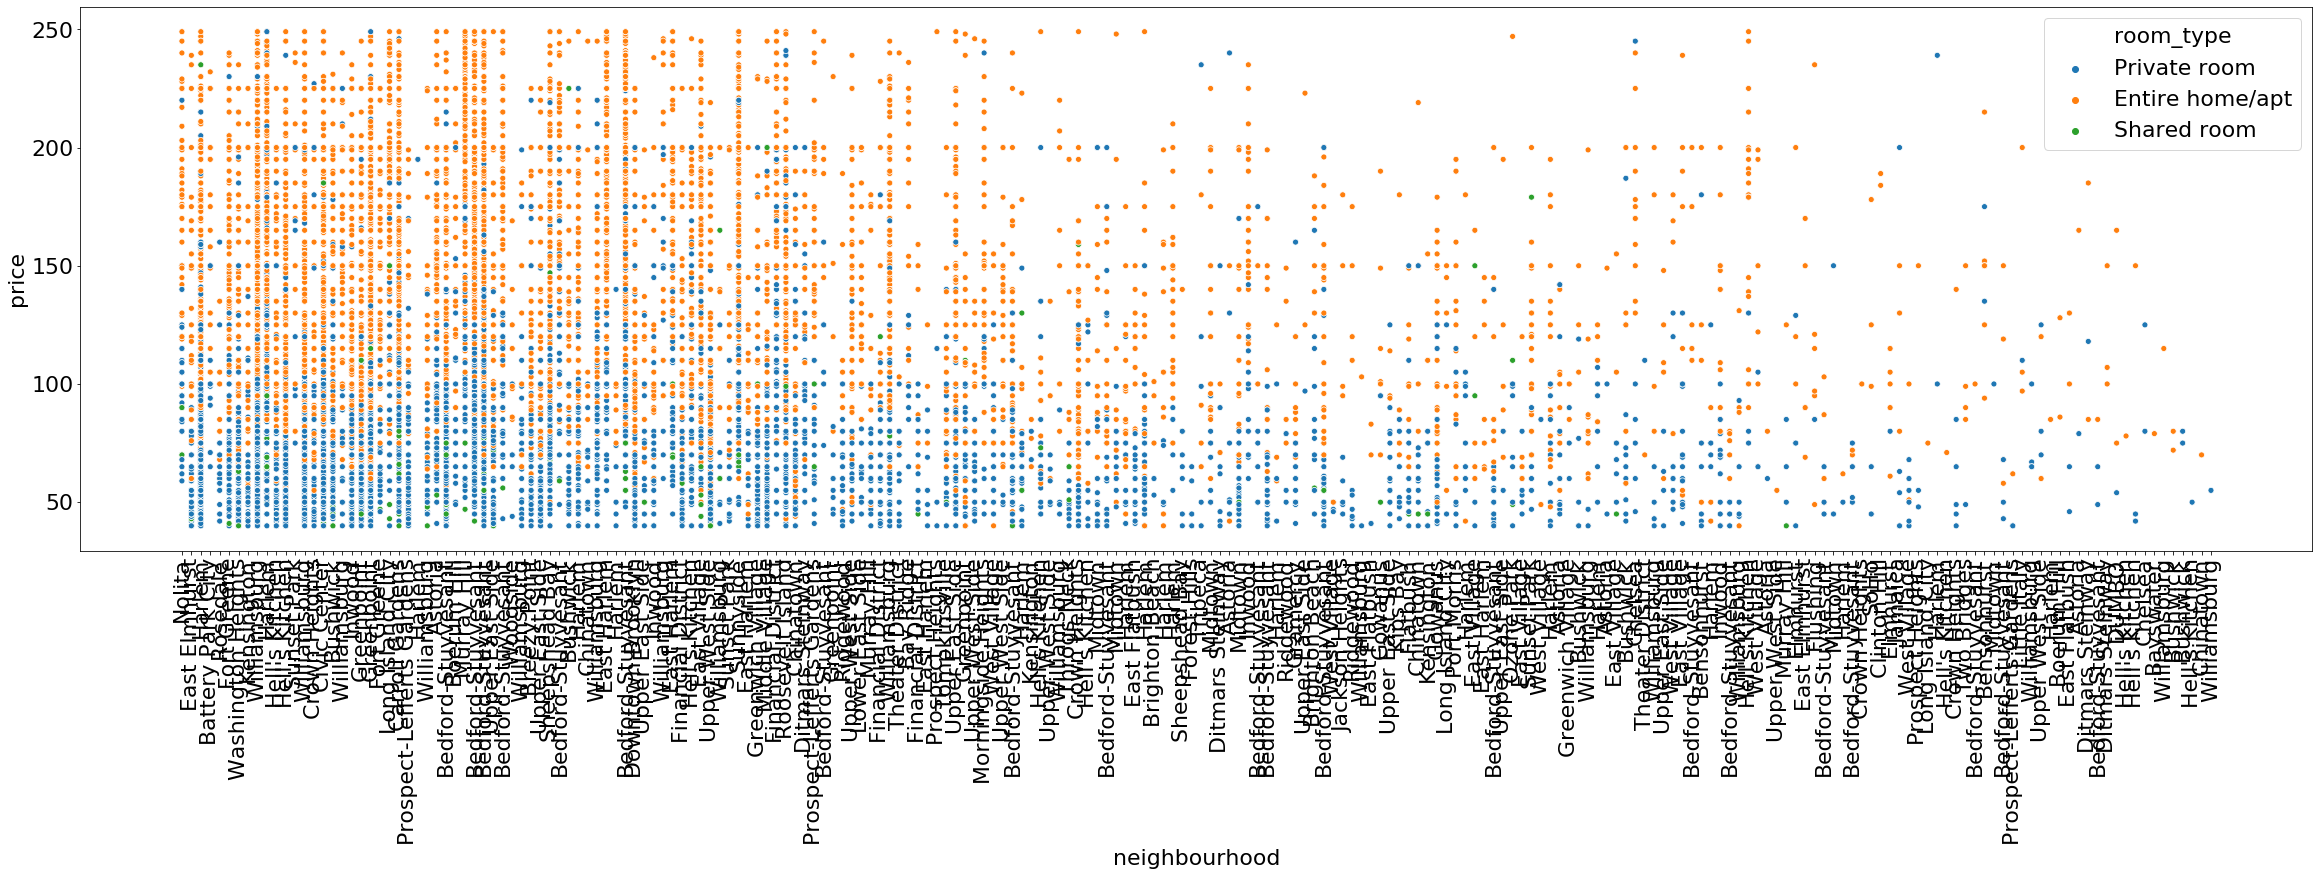

In [55]:
import seaborn as sns

plt.figure(figsize = (40,10))

ax = sns.scatterplot(x = 'neighbourhood', y = 'price',hue = 'room_type',  data = df4.iloc[:])
                    
ax.set_xticklabels(df4.neighbourhood, rotation=90)

plt.show()

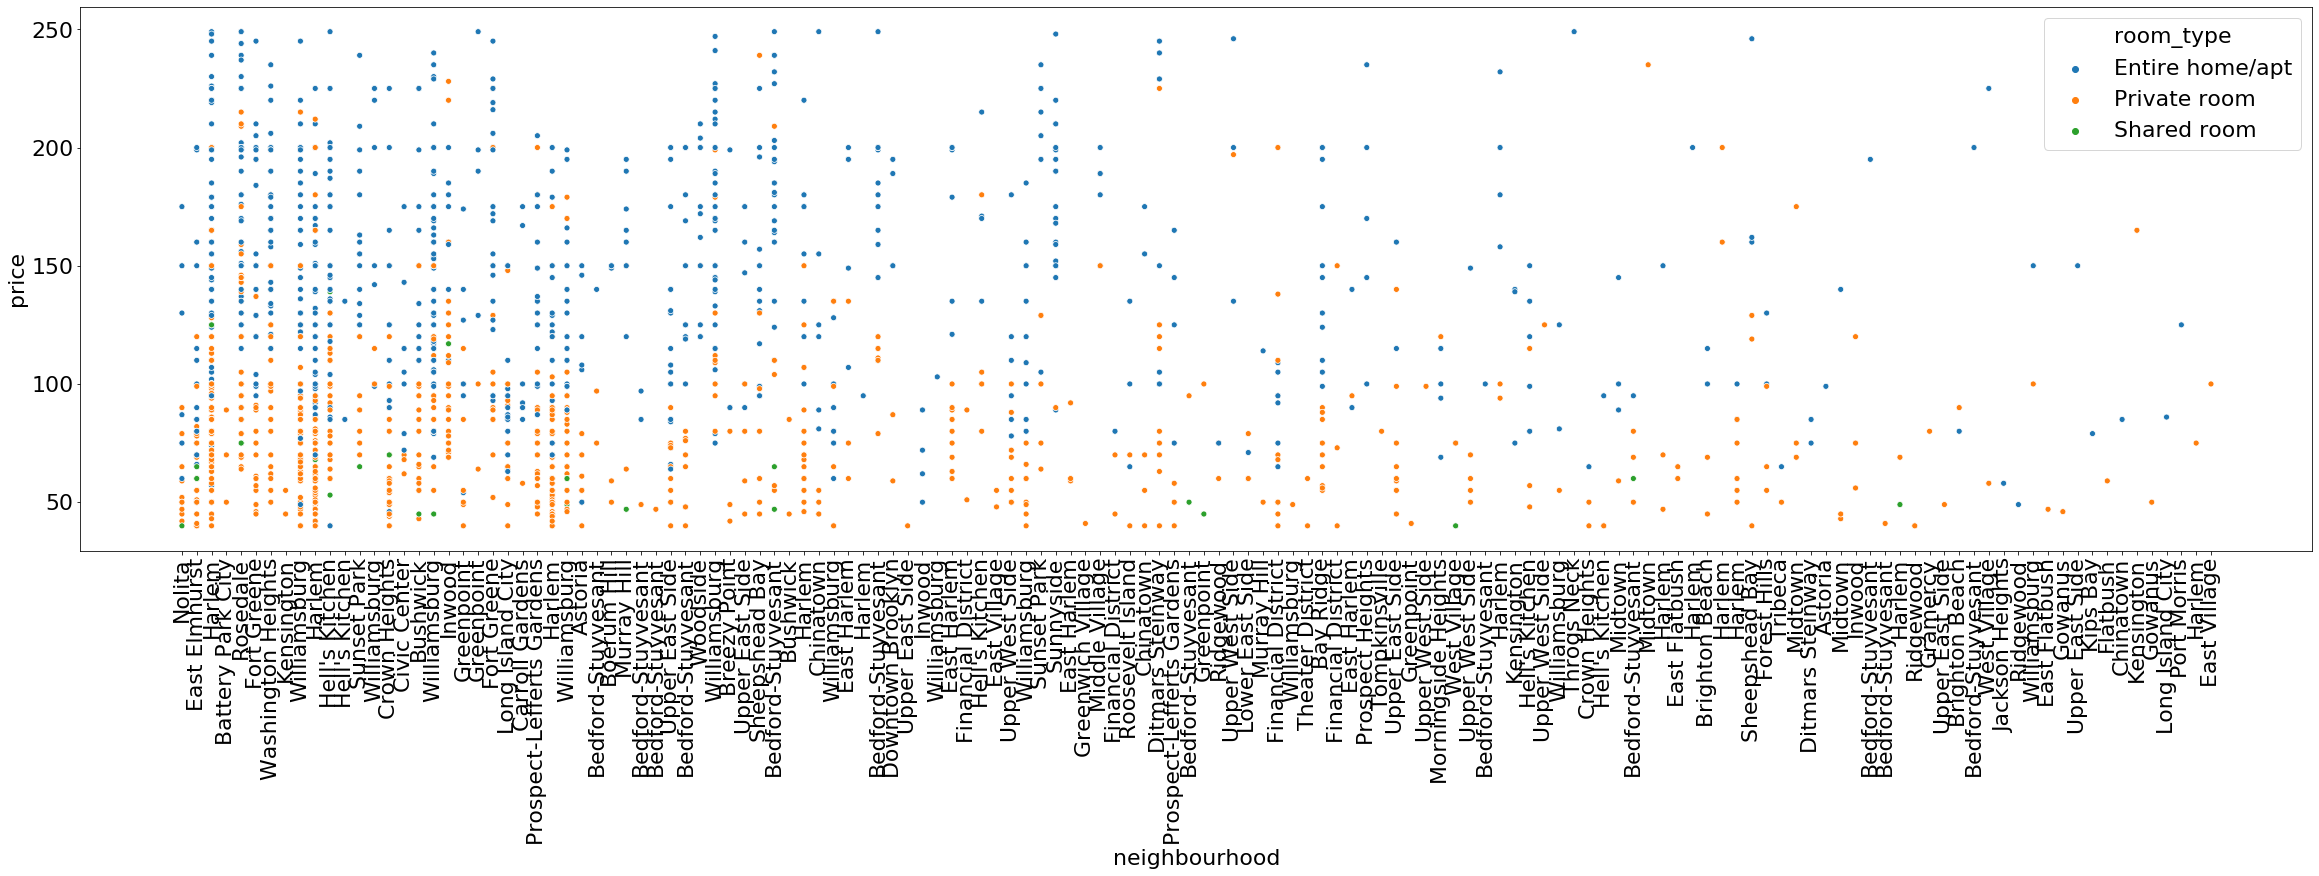

In [54]:
plt.figure(figsize = (40,10))

ax = sns.scatterplot(x = 'neighbourhood', y = 'price',hue = 'room_type',  data = df4.iloc[1000:3000])
                    
ax.set_xticklabels(df4.neighbourhood, rotation=90)

plt.show()

In [28]:
df4.neighbourhood.value_counts()

Williamsburg          2387
Bedford-Stuyvesant    2287
Harlem                1698
Bushwick              1519
Upper West Side       1106
                      ... 
Lighthouse Hill          1
Graniteville             1
Rossville                1
Spuyten Duyvil           1
Bull's Head              1
Name: neighbourhood, Length: 216, dtype: int64

In [29]:
## Counts for same price in particular neighbourhood

In [30]:
df5 = df4[["neighbourhood","price"]].value_counts().reset_index(name='counts')
df5.head(50)

,neighbourhood,price,counts
0,Bushwick,50,151
1,Bedford-Stuyvesant,50,134
2,Williamsburg,100,127
3,Bedford-Stuyvesant,60,126
4,Williamsburg,60,117
5,Bedford-Stuyvesant,100,115
6,Williamsburg,150,112
7,Williamsburg,200,108
8,Williamsburg,80,99
9,Harlem,100,97


## Price distribution and homestays in Neighbourhoods wrt common price (within  250 value )

In [8]:
import seaborn as sns

plt.figure(figsize = (40,10))

ax = sns.scatterplot(x = 'neighbourhood', y = 'counts',hue = 'price',  data = df5.head(1000), alpha = 1)

ax.set_xticklabels(df6.neighbourhood, rotation=90)

plt.show()

NameError: name 'df5' is not defined

<Figure size 2880x720 with 0 Axes>

In [ ]:
import seaborn as sns

plt.figure(figsize = (40,10))

ax = sns.scatterplot(x = 'neighbourhood', y = 'price',hue = 'room_type',  data = df4.head(100))

ax.set_xticklabels(df6.neighbourhood, rotation=90)

In [ ]:
df6.drop(["latitude","longitude","id","room_type"], axis = 1)

In [ ]:
df7 = df6[["neighbourhood","price"]].value_counts().reset_index(name='counts')


## Preparing Data for Machine Learning

In [ ]:
X = df6.drop("price" , axis = 1)

In [ ]:
y = df6["price"].copy()

In [ ]:
X.host_id.value_counts()

In [ ]:
X_tail = df6[["neighbourhood"]].value_counts().head(120).rename_axis('neighbourhood').reset_index(name='counts')

In [ ]:
X_tail['neighbourhood']

In [ ]:
X_tail

In [ ]:
import seaborn as sns

plt.figure(figsize = (40,10))

ax = sns.scatterplot(x = 'neighbourhood', y = 'price',hue = 'room_type',  data = X_tail)
ax.set_xticklabels(X._tail.neighbourhood, rotation=90)

plt.show()